<h1 align="center">SPEECH EMOTION RECOGNITION USING DEEP LEARNING</h1>

<h3 align="center">DHAVAN NAGARAJ - 10626855</h3>



#### Speech Emotion Recognition - SER
Speech Emotion Recognition, abbreviated as SER, is the act of attempting to recognize human emotion and affective states from speech. This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch.

Speech emotion recognition using Rnn and LSTM Neural Networks (RNNs) is a popular application of machine learning and deep learning in the field of audio processing. Emotion recognition aims to detect and classify the emotional state of a speaker based on their speech signal.


#### Datasets used in this project:

* Crowd-sourced Emotional Mutimodal Actors Dataset (Crema-D)
    - CREMA-D is an audio data set for emotion recognition. The data set consists of vocal emotional expressions in sentences spoken in a range of basic emotional states (happy, sad, anger, fear, disgust, and neutral).

Dataset Link: https://www.kaggle.com/datasets/ejlok1/cremad


# **Imports**

In [ ]:
# Import necessary libraries for audio processing, feature extraction,
# data visualization, and deep learning tasks.
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from IPython.display import Audio, display
from keras.utils import to_categorical
import random

In [ ]:
# Set the variable 'Crema' to the directory path where the audio files for processing are stored.

Crema = "/drive/MyDrive/x-vector-temp/AudioWAV/"

# **Loading Dataset**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Changing directory to sample_data
%cd /content/drive/MyDrive/x-vector-temp/

# Verify the file present in the directory
%ls

/content/drive/MyDrive/x-vector-temp
AudioWAV/  AudioWAV.zip  data_df.csv


In [ ]:
# Unzip the file present in sample_data
!unzip AudioWAV.zip

Streaming output truncated to the last 5000 lines.
  inflating: AudioWAV/1031_DFA_DIS_XX.wav  
  inflating: AudioWAV/1031_DFA_FEA_XX.wav  
  inflating: AudioWAV/1031_DFA_HAP_XX.wav  
  inflating: AudioWAV/1031_DFA_NEU_XX.wav  
  inflating: AudioWAV/1031_DFA_SAD_XX.wav  
  inflating: AudioWAV/1031_IEO_ANG_HI.wav  
  inflating: AudioWAV/1031_IEO_ANG_LO.wav  
  inflating: AudioWAV/1031_IEO_ANG_MD.wav  
  inflating: AudioWAV/1031_IEO_DIS_HI.wav  
  inflating: AudioWAV/1031_IEO_DIS_LO.wav  
  inflating: AudioWAV/1031_IEO_DIS_MD.wav  
  inflating: AudioWAV/1031_IEO_FEA_HI.wav  
  inflating: AudioWAV/1031_IEO_FEA_LO.wav  
  inflating: AudioWAV/1031_IEO_FEA_MD.wav  
  inflating: AudioWAV/1031_IEO_HAP_HI.wav  
  inflating: AudioWAV/1031_IEO_HAP_LO.wav  
  inflating: AudioWAV/1031_IEO_HAP_MD.wav  
  inflating: AudioWAV/1031_IEO_NEU_XX.wav  
  inflating: AudioWAV/1031_IEO_SAD_HI.wav  
  inflating: AudioWAV/1031_IEO_SAD_LO.wav  
  inflating: AudioWAV/1031_IEO_SAD_MD.wav  
  inflating: AudioWAV/103

In [ ]:
# Map abbreviated emotion labels to their corresponding full emotion names.
crema_emotions = {
    'NEU':'neutral',
    'HAP':'happy',
    'SAD':'sad',
    'ANG':'angry',
    'FEA':'fear',
    'DIS':'disgust'}

In [ ]:
# Traverse through the directory structure and print information about directories and files.

for root, dirs, files in os.walk('/content/drive/MyDrive/x-vector-temp/AudioWAV'):
    print(root)  # Print the current directory path
    print(dirs)  # Print subdirectory names in the current directory
    print(files) # Print file names in the current directory

/content/drive/MyDrive/x-vector-temp/AudioWAV
[]
['1086_IEO_FEA_HI.wav', '1086_IEO_FEA_LO.wav', '1086_IEO_FEA_MD.wav', '1086_IEO_HAP_HI.wav', '1086_IEO_HAP_LO.wav', '1086_IEO_HAP_MD.wav', '1086_IEO_NEU_XX.wav', '1086_IEO_SAD_HI.wav', '1086_IEO_SAD_LO.wav', '1086_IEO_SAD_MD.wav', '1086_IOM_ANG_XX.wav', '1086_IOM_DIS_XX.wav', '1086_IOM_HAP_XX.wav', '1086_IOM_FEA_XX.wav', '1086_IOM_NEU_XX.wav', '1086_IOM_SAD_XX.wav', '1086_ITH_ANG_XX.wav', '1086_ITH_DIS_XX.wav', '1086_ITH_HAP_XX.wav', '1086_ITH_FEA_XX.wav', '1086_ITH_NEU_XX.wav', '1086_ITH_SAD_XX.wav', '1086_ITS_ANG_XX.wav', '1086_ITS_DIS_XX.wav', '1086_ITS_FEA_XX.wav', '1086_ITS_HAP_XX.wav', '1086_ITS_SAD_XX.wav', '1086_ITS_NEU_XX.wav', '1086_IWL_DIS_XX.wav', '1086_IWL_ANG_XX.wav', '1086_IWL_FEA_XX.wav', '1086_IWL_HAP_XX.wav', '1086_IWL_NEU_XX.wav', '1086_IWL_SAD_XX.wav', '1086_IWW_DIS_XX.wav', '1086_IWW_ANG_XX.wav', '1086_IWW_FEA_XX.wav', '1086_IWW_HAP_XX.wav', '1086_IWW_SAD_XX.wav', '1086_MTI_ANG_XX.wav', '1086_IWW_NEU_XX.wav', '1086_M

In [ ]:
# Set your base path where audio files are stored
data_path = '/content/drive/MyDrive/x-vector-temp/AudioWAV'

# Define a dictionary mapping file name parts to emotions
emotion_map = {
    'SAD': 'sad',
    'ANG': 'angry',
    'DIS': 'disgust',
    'FEA': 'fear',
    'HAP': 'happy',
    'NEU': 'neutral'
}

file_emotion = []  # List to store extracted emotions from file names
file_path = []  # List to store full file paths

# Traverse through the directory tree rooted at data_path
for root, dirs, files in os.walk(data_path):
    for file in files:
        # Build the full file path
        full_file_path = os.path.join(root, file)
        file_path.append(full_file_path)

        # Split the file name and extract the emotion code
        parts = file.split('_')
        if len(parts) > 2:
            emotion_code = parts[2]
            # Map the emotion code to emotions using the defined dictionary
            file_emotion.append(emotion_map.get(emotion_code, 'Unknown'))  # Use 'Unknown' if not found
        else:
            file_emotion.append('Unknown')

# Create DataFrames from the collected data
emotion_df = pd.DataFrame(file_emotion, columns=['Emotion'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenate the DataFrames along the columns
data_df = pd.concat([emotion_df, path_df], axis=1)

# Display the first few rows of the DataFrame
data_df.head()

,Emotion,Path
0,fear,/content/drive/MyDrive/x-vector-temp/AudioWAV/...
1,fear,/content/drive/MyDrive/x-vector-temp/AudioWAV/...
2,fear,/content/drive/MyDrive/x-vector-temp/AudioWAV/...
3,happy,/content/drive/MyDrive/x-vector-temp/AudioWAV/...
4,happy,/content/drive/MyDrive/x-vector-temp/AudioWAV/...


In [ ]:
# Print the shape to verify the amount of files
data_df.to_csv('data_df.csv')
data_df.shape

(7442, 2)

In [ ]:
# Print head of dataset to observe
data_df.head()

,Emotion,Path
0,fear,/content/drive/MyDrive/x-vector-temp/AudioWAV/...
1,fear,/content/drive/MyDrive/x-vector-temp/AudioWAV/...
2,fear,/content/drive/MyDrive/x-vector-temp/AudioWAV/...
3,happy,/content/drive/MyDrive/x-vector-temp/AudioWAV/...
4,happy,/content/drive/MyDrive/x-vector-temp/AudioWAV/...


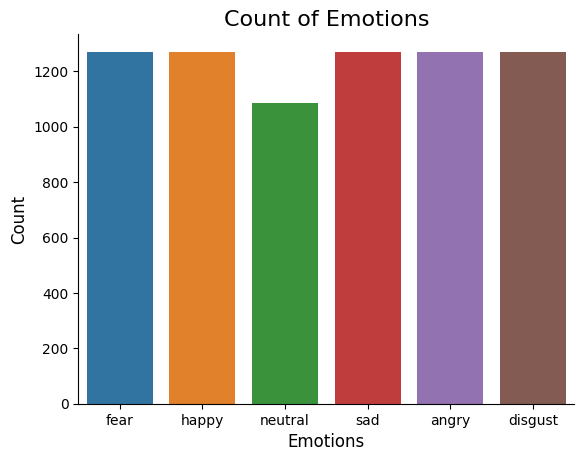

In [ ]:
# Plot to show the number of datapoints with each emotion
plt.title('Count of Emotions', size=16)
sns.countplot(x=data_df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# **Visualization**

##**Librosa**

Librosa is a Python library for analyzing and extracting features from audio and music signals. It provides a wide range of tools for tasks like loading audio files, visualizing waveforms and spectrograms, extracting features (e.g., Mel-frequency cepstral coefficients - MFCCs).

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def create_waveplot(data, sr, e):
    """
    Generates a waveplot for audio data associated with a specific emotion.

    Args:
    - data: Audio data.
    - sr: Sampling rate (number of samples per second).
    - e: Emotion associated with the audio data.

    Displays a visual representation of the audio waveform for analysis or visualization.
    """
    plt.figure(figsize=(10, 3))  # Figure size set for the waveplot
    plt.title('Waveplot for {} emotion'.format(e), size=15)  # Title indicating the emotion
    librosa.display.waveplot(data, sr=sr)  # Display the waveform using librosa
    plt.show()

## **Audio and Plottings**

In [ ]:
for index, row in data_df.iterrows(): # Iteration through dataframe
    try:
        # Loading the audio file using the path column of each row
        data, sampling_rate = librosa.load(row['Path'])
        print("count ",index) # Print the count of the processed file
    except Exception as e:
        # If any error occurs during the loading or processing of the audio, print the error message
        print(f"An error occurred while processing the file {row['Path']}: {e}")

Streaming output truncated to the last 5000 lines.
count  2442
count  2443
count  2444
count  2445
count  2446
count  2447
count  2448
count  2449
count  2450
count  2451
count  2452
count  2453
count  2454
count  2455
count  2456
count  2457
count  2458
count  2459
count  2460
count  2461
count  2462
count  2463
count  2464
count  2465
count  2466
count  2467
count  2468
count  2469
count  2470
count  2471
count  2472
count  2473
count  2474
count  2475
count  2476
count  2477
count  2478
count  2479
count  2480
count  2481
count  2482
count  2483
count  2484
count  2485
count  2486
count  2487
count  2488
count  2489
count  2490
count  2491
count  2492
count  2493
count  2494
count  2495
count  2496
count  2497
count  2498
count  2499
count  2500
count  2501
count  2502
count  2503
count  2504
count  2505
count  2506
count  2507
count  2508
count  2509
count  2510
count  2511
count  2512
count  2513
count  2514
count  2515
count  2516
count  2517
count  2518
count  2519
count  2520
c

## **Audio Signal Processing Functions**

In [ ]:
# Function noise adds random noise to an audio signal
def noise(data, random = False, rate = 0.035, threshold = 0.075):  # Magnitude noise rate and maximum noise threshold
    if random:
        rate = np.random.random() * threshold
# Amplitude of the noise to be added
    noise_amp = rate * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size = data.shape[0])
    return data

# Time stretching on an audio signal
def stretch(data, rate = 0.8):
    return librosa.effects.time_stretch(data, rate = rate)

# Time shifting on an audio signal
def shift(data, rate = 1000):
    shift_range = int(np.random.uniform(low = -5, high = 5) * rate)
    return np.roll(data, shift_range)

# Alters the pitch of AS without changing duration
def pitch(data, sampling_rate, pitch_factor=0.7, random = False):
    if random:
        pitch_factor = np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data, sr = sampling_rate, n_steps = pitch_factor) #Pitch shift amount in semitones

## **Visualizing Audio Waveforms: Random Selection Waveplot**

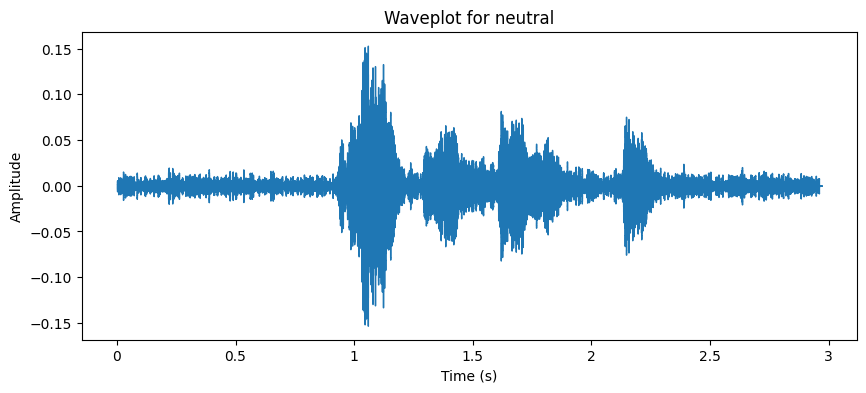

In [ ]:
# Function to create a waveplot
def create_waveplot(data, sr, title):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr=sr)
    plt.title(f'Waveplot for {title}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Select a random row from the DataFrame
random_index = random.randint(0, len(data_df) - 1)
random_file_path = data_df.iloc[random_index]['Path']
random_emotion = data_df.iloc[random_index]['Emotion']

# Load the audio file
data, sampling_rate = librosa.load(random_file_path)

# Create and display the waveplot
create_waveplot(data, sampling_rate, random_emotion)

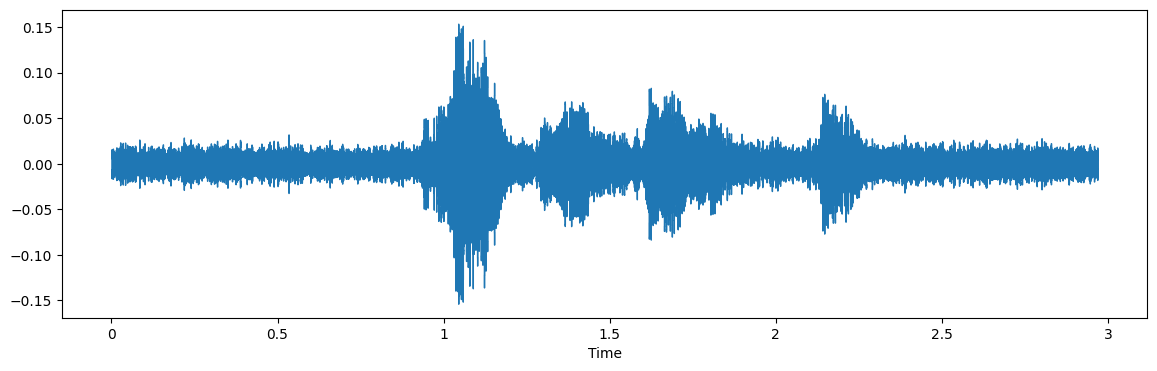

In [ ]:
# Applying Random Noise to the audio data
noised_data = noise(data, random = True)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = noised_data, sr = sampling_rate)
Audio(noised_data, rate = sampling_rate)

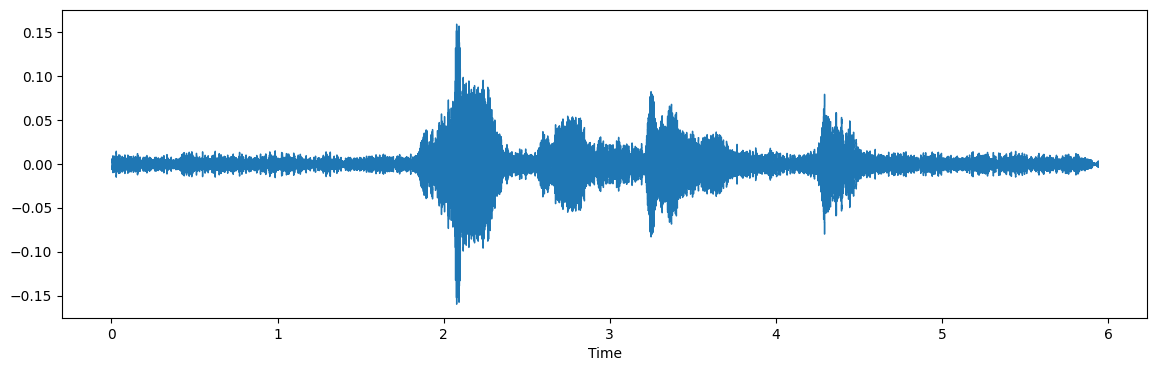

In [ ]:
# Applying time stretching to the audio data
stretched_data = stretch(data, rate = 0.5)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = stretched_data, sr = sampling_rate)
Audio(stretched_data, rate = sampling_rate)

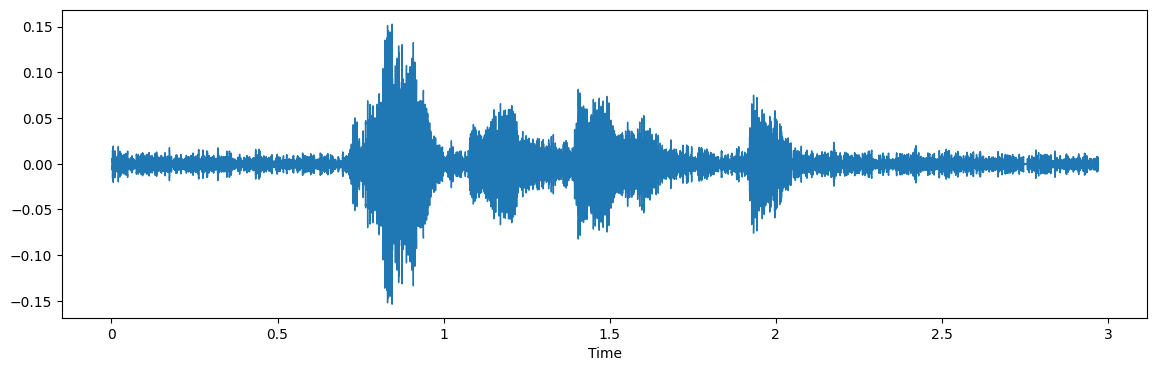

In [ ]:
# Applying time shifting to the audio data
shifted_data = shift(data)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = shifted_data, sr = sampling_rate)
Audio(shifted_data, rate = sampling_rate)

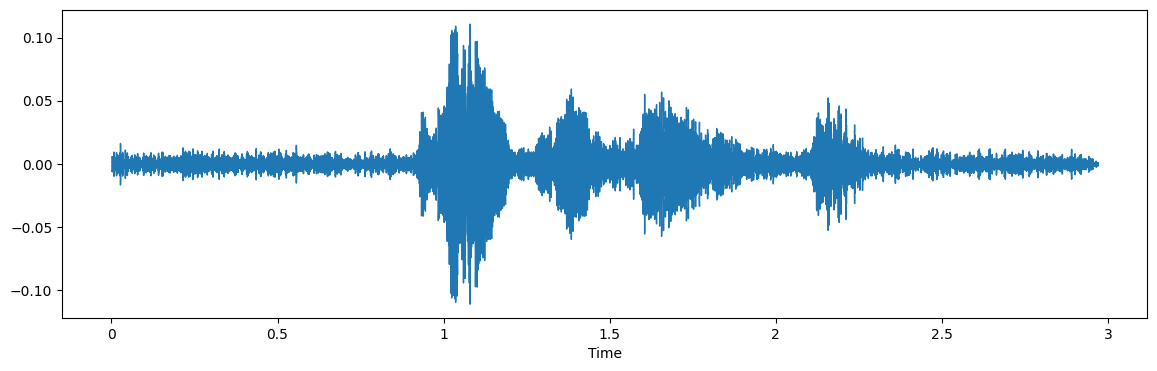

In [ ]:
#Applying pitch shift to the audio data
pitched_data = pitch(data, sampling_rate, pitch_factor = 0.5, random=True)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = pitched_data, sr = sampling_rate)
Audio(pitched_data, rate = sampling_rate)

In [ ]:
%cd /content/
data_df.to_csv('data_df.csv')

/content


#**SPEECHBRAIN**

SpeechBrain is an open-source, all-in-one speech toolkit developed by the Speech Processing and Understanding group at Idiap Research Institute. It provides various functionalities for speech processing, including pre-trained models, tools for building speech-related systems, and access to datasets.

In [ ]:
!pip install speechbrain
import torchaudio
from speechbrain.pretrained import EncoderClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.6/630.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 17.3 MB/s eta 0:00:00


#**X VECTOR MODEL**

Deep neural network embeddings called x-vectors were extracted from the audio samples using a pre-trained model from Speech Brain.

1.   X-vectors are state-of-the-art speech representations learned from large datasets.
2.   They encode characteristics like speaker identity, accent, speech style, and phonetic content.
3. The pre-trained model provides 512-dim x-vector features without requiring training a network from scratch.
4. X-vectors were extracted per audio clip and flattened into a single 1D vector.
Including deep learned features boosts performance and generalizability.




In [ ]:
# Initialize the pre-trained x-vector model
classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-xvect-voxceleb", savedir="pretrained_models/spkrec-xvect-voxceleb")

# New DataFrame columns for x-vectors
data_df['X_vectors'] = np.nan
data_df['X_vectors'] = data_df['X_vectors'].astype(object) # To store array in DataFrame

for index, row in data_df.iterrows():
    try:
        # Load the audio file using the path
        signal, fs = torchaudio.load(row['Path'])

        # Extract x-vectors
        embeddings = classifier.encode_batch(signal)

        # Store x-vectors in DataFrame
        data_df.at[index, 'X_vectors'] = embeddings.detach().numpy()

        print(f"Processed file {index+1}/{len(data_df)}")

    except Exception as e:
        # If any error occurs during the loading or processing of the audio, print the error message
        print(f"An error occurred while processing the file {row['Path']}: {e}")

hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
Processed file 2443/7442
Processed file 2444/7442
Processed file 2445/7442
Processed file 2446/7442
Processed file 2447/7442
Processed file 2448/7442
Processed file 2449/7442
Processed file 2450/7442
Processed file 2451/7442
Processed file 2452/7442
Processed file 2453/7442
Processed file 2454/7442
Processed file 2455/7442
Processed file 2456/7442
Processed file 2457/7442
Processed file 2458/7442
Processed file 2459/7442
Processed file 2460/7442
Processed file 2461/7442
Processed file 2462/7442
Processed file 2463/7442
Processed file 2464/7442
Processed file 2465/7442
Processed file 2466/7442
Processed file 2467/7442
Processed file 2468/7442
Processed file 2469/7442
Processed file 2470/7442
Processed file 2471/7442
Processed file 2472/7442
Processed file 2473/7442
Processed file 2474/7442
Processed file 2475/7442
Processed file 2476/7442
Processed file 2477/7442
Processed file 2478/7442
Processed file 2479/7442
Processed file 2480/7442

In [ ]:
# Checking the number of non-null x-vector entries
num_x_vectors = data_df['X_vectors'].notnull().sum()
print(f"Number of non-null x-vectors: {num_x_vectors} out of {len(data_df)}")

# Optionally, print the shape of the first non-null x-vector
for x_vector in data_df['X_vectors']:
    if x_vector is not None:
        print(f"Shape of the first non-null x-vector: {x_vector.shape}")
        break

# Optionally, print the first few x-vectors
print("First few x-vectors:")
data_df['X_vectors'].head()

Number of non-null x-vectors: 7442 out of 7442
Shape of the first non-null x-vector: (1, 1, 512)
First few x-vectors:


0    [[[-19.68034, 1.715873, 8.543296, 6.8502803, 4...
1    [[[-21.976307, 4.015276, 9.591565, 5.6431117, ...
2    [[[-30.628668, 0.2544894, 6.98763, 11.824714, ...
3    [[[-22.15612, 0.62031525, 12.5694895, 1.387111...
4    [[[-20.118406, 5.3324428, 13.11092, 1.8827304,...
Name: X_vectors, dtype: object

# **Feature Extraction**

1. MFCC
2. Zero Crossing Rate
3. Root Mean Square

**1. Mel-Frequency Cepstral Coefficients (MFCC):**

   Description: MFCCs are a representation of the short-term power spectrum of a sound. They mimic the human auditory system by capturing frequency bands on a logarithmic scale.

   Usage: Extracted from short frames of audio, MFCCs are useful for speech and music processing tasks, like speech recognition, speaker identification, and genre classification.

**2. Zero Crossing Rate:**

Description: This measures the rate at which the audio waveform changes sign (crosses zero). It's a simple, intuitive feature that provides information about the frequency content and noisiness of the signal.

Usage: Useful in speech recognition, audio segmentation, and differentiating between voiced and unvoiced segments in speech.

**3. Root Mean Square (RMS):**

Description: RMS calculates the average energy in an audio signal within a specific window of time. It's computed by taking the square root of the mean of the squared values of the signal.

Usage: Useful for measuring the overall energy or amplitude of a signal. Commonly used in audio processing for tasks like volume normalization, silence removal, and audio event detection.

In [ ]:
X, Y = [], []  # X = Combined feature vector, Y = emotion labels

for index, row in data_df.iterrows():
    try:
        # Load the audio file and extract features
        data, sampling_rate = librosa.load(row['Path'], duration=2.5, offset=0.6)

        # Compute MFCC features
        mfcc_feature = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)

        # Compute zero crossing rate (ZCR) and root mean square (RMS)
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
        rms = np.mean(librosa.feature.rms(y=data).T, axis=0)

        # Retrieve the x-vector and flatten it
        x_vector = row['X_vectors'].flatten()  # Flatten the x-vector

        # Ensure all arrays are 1D
        mfcc_feature = mfcc_feature.ravel()
        x_vector = x_vector.ravel()
        zcr = zcr.ravel()
        rms = rms.ravel()

        # Combine MFCCs, ZCR, RMS, and x-vector
        combined_feature = np.hstack((mfcc_feature, zcr, rms, x_vector))

        X.append(combined_feature)
        Y.append(row['Emotion'])

        if index % 1000 == 0:
            print(f"{index} samples have been processed...")
    except Exception as e:
        print(f"Error processing file {row['Path']}: {e}")

0 samples have been processed...
1000 samples have been processed...
2000 samples have been processed...
3000 samples have been processed...
4000 samples have been processed...
5000 samples have been processed...
6000 samples have been processed...
7000 samples have been processed...


In [ ]:
features_path = './features_zcf_rmse_mfcc.csv'


In [ ]:
extracted_df = pd.DataFrame(X)
extracted_df['labels'] = Y
extracted_df.to_csv(features_path, index = False)
extracted_df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,545,546,547,548,549,550,551,552,553,labels
0,-342.698212,104.421471,4.765877,34.219604,-11.856703,16.200394,-6.589272,9.753685,-10.016991,1.208439,...,9.691240,3.842262,-2.998485,-7.850124,10.169474,12.012679,-3.638348,9.040691,-11.033219,fear
1,-467.446106,154.590607,-0.173502,55.382645,-19.410614,34.042404,-12.841308,20.541149,-9.091673,3.388186,...,7.284801,-1.752071,-3.225777,2.426814,8.448956,5.915210,-6.607732,8.110266,-15.138670,fear
2,-410.510315,129.359909,-6.431947,54.565937,-13.411658,37.477779,-18.228882,10.914980,-6.134166,6.698647,...,5.295094,2.670140,-2.701315,-3.966336,5.077792,6.952923,-0.101314,12.110952,-14.857255,fear
3,-380.634796,98.751244,3.698692,39.188263,1.930889,18.492746,-1.747251,8.942449,-3.160785,-1.153710,...,16.706812,5.053738,-2.910825,-4.242714,8.837858,5.873555,2.873618,8.172132,-8.544427,happy
4,-444.199829,149.515869,2.388460,50.910778,-11.517123,24.394346,-7.816689,18.880995,-12.972528,1.175516,...,11.168167,4.752557,-3.072936,3.673461,13.397573,3.770455,-7.110395,5.937573,-11.417647,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-412.932404,138.451126,17.171186,48.569717,5.536626,20.442535,-15.453538,2.772387,-9.527735,-7.121705,...,6.199790,0.757563,-3.938297,-1.886262,9.967970,2.333911,-8.826837,7.225427,-23.012943,happy
96,-444.709106,156.473831,11.725377,59.975811,-5.611668,30.115166,-16.484262,10.299959,-8.617519,-0.500519,...,6.448768,4.031649,-3.571490,5.396710,6.730888,7.476353,-11.260524,7.991648,-18.824356,neutral
97,-439.339386,156.778595,11.855767,69.846344,-1.196205,31.481176,-20.919930,8.237358,-15.699174,-2.474212,...,2.744577,7.578822,-4.089736,7.223278,11.112346,6.589429,-6.667982,7.053049,-23.235771,sad
98,-438.192566,142.666077,9.240545,52.829430,-9.039454,31.683002,-17.680820,10.000765,-9.026598,5.498538,...,6.174900,-4.234201,-4.005537,2.257127,13.789267,3.991394,-8.097115,8.224144,-16.394899,angry


In [ ]:
extracted_df.shape

(7442, 555)

#**Model Building, Evaluation and Testing Methodology**



##**Data Partitioning**

In [ ]:
from sklearn.model_selection import train_test_split

# Convert X and Y to NumPy arrays if they aren't already
X = np.array(X)
Y = np.array(Y)

# Split the data into training, validation, and test sets
# First, split into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Then, split the training set into training and validation sets (95% train, 5% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract features and labels
X = extracted_df.drop(columns=['labels'])
Y = extracted_df['labels']

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


##**K-Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


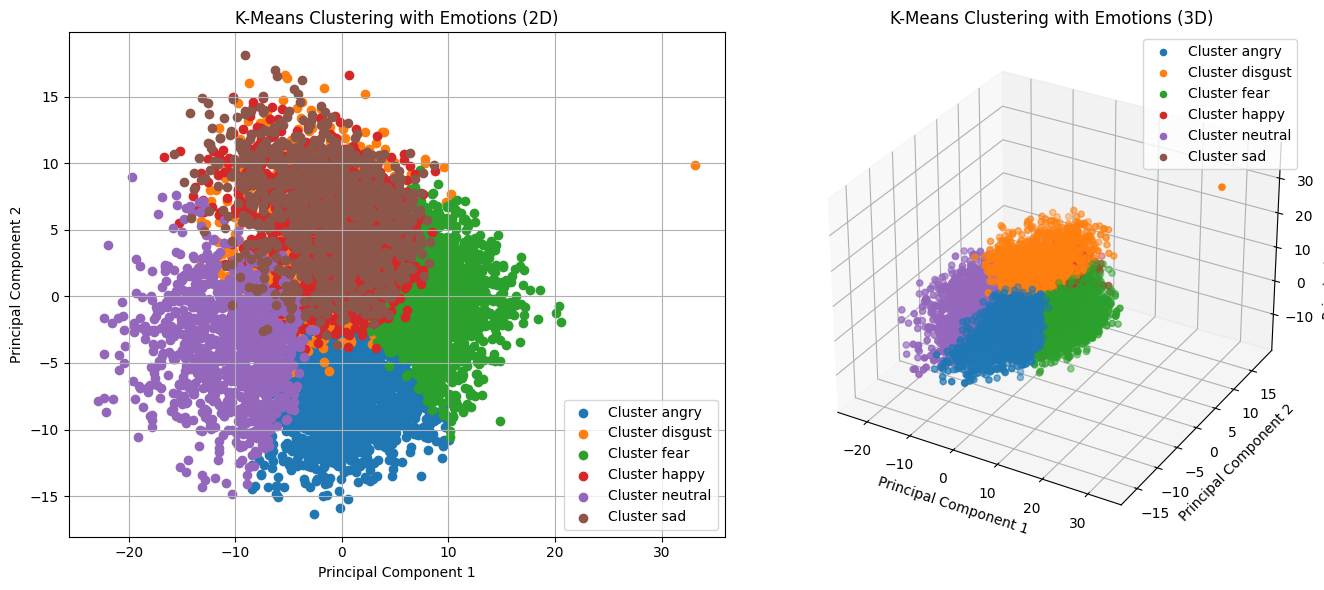

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assume X contains your features and Y contains your labels/emotions

# Label encoding for categorical labels (if needed)
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

# Feature scaling
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform K-Means clustering
num_clusters = len(set(Y))  # Number of clusters based on unique emotions
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_normalized)

# Create PCA for dimensionality reduction (2 components for 2D)
pca_2d = PCA(n_components=2)
reduced_features_2d = pca_2d.fit_transform(X_normalized)

# Create PCA for dimensionality reduction (3 components for 3D)
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(X_normalized)

# Create a DataFrame with reduced features and emotions for 2D
df_reduced_2d = pd.DataFrame(reduced_features_2d, columns=['PC1', 'PC2'])
df_reduced_2d['Cluster'] = cluster_labels
df_reduced_2d['Emotion'] = Y  # Assuming Y contains emotion labels

# Create a DataFrame with reduced features and emotions for 3D
df_reduced_3d = pd.DataFrame(reduced_features_3d, columns=['PC1', 'PC2', 'PC3'])
df_reduced_3d['Cluster'] = cluster_labels
df_reduced_3d['Emotion'] = Y  # Assuming Y contains emotion labels

# Plotting clusters with emotions in 2D
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for label in range(num_clusters):
    emotion = le.inverse_transform([label])[0]
    cluster_data = df_reduced_2d[df_reduced_2d['Cluster'] == label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {emotion}')

plt.title('K-Means Clustering with Emotions (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Plotting clusters with emotions in 3D
ax = plt.subplot(1, 2, 2, projection='3d')

for label in range(num_clusters):
    emotion = le.inverse_transform([label])[0]
    cluster_data = df_reduced_3d[df_reduced_3d['Cluster'] == label]
    ax.scatter(
        cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
        label=f'Cluster {emotion}'
    )

ax.set_title('K-Means Clustering with Emotions (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.tight_layout()
plt.show()

##**PCA**

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Set the number of components as needed
reduced_features = pca.fit_transform(X_normalized)

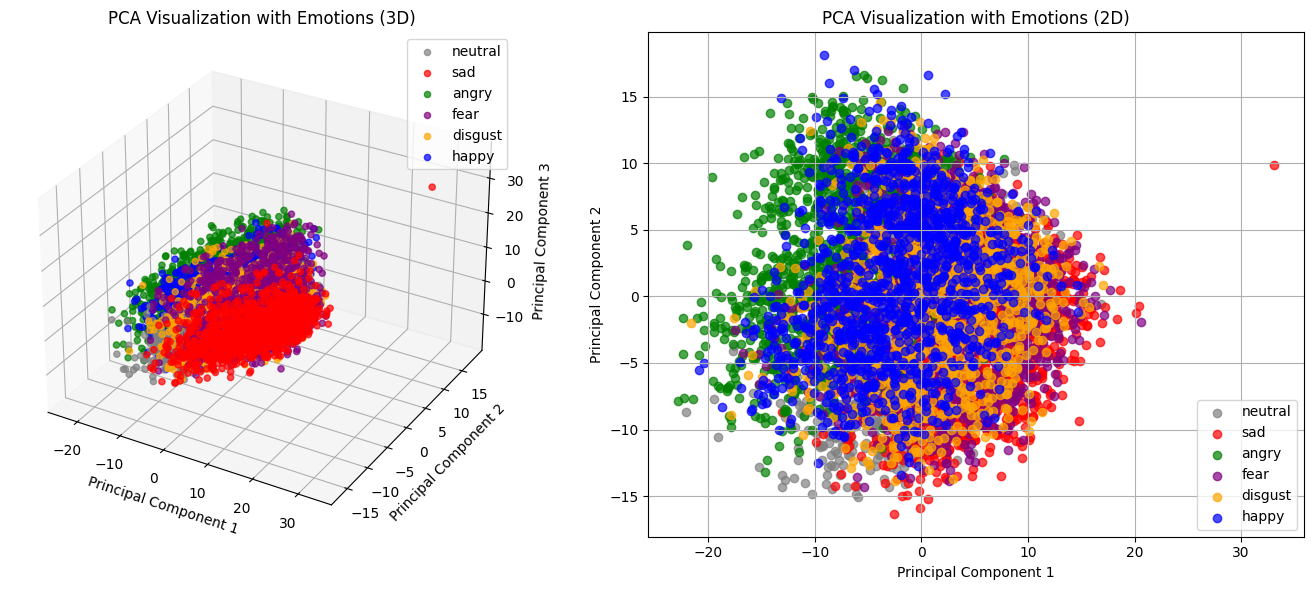

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_normalized contains your normalized features after StandardScaler
# Assuming Y contains your emotion labels

# Apply PCA for dimensionality reduction (2 components for 2D)
pca_2d = PCA(n_components=2)
reduced_features_2d = pca_2d.fit_transform(X_normalized)

# Apply PCA for dimensionality reduction (3 components for 3D)
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(X_normalized)

# Create DataFrames with reduced features and emotions for 2D and 3D
df_reduced_2d = pd.DataFrame(reduced_features_2d, columns=['PC1', 'PC2'])
df_reduced_2d['Emotion'] = Y

df_reduced_3d = pd.DataFrame(reduced_features_3d, columns=['PC1', 'PC2', 'PC3'])
df_reduced_3d['Emotion'] = Y

# Plotting PCA with emotions in 2D
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
for emotion, color in emotion_color_dict.items():
    emotion_data = df_reduced_2d[df_reduced_2d['Emotion'] == emotion]
    plt.scatter(emotion_data['PC1'], emotion_data['PC2'], c=color, label=emotion, alpha=0.7)

plt.title('PCA Visualization with Emotions (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Plotting PCA with emotions in 3D
ax = plt.subplot(1, 2, 1, projection='3d')

for emotion, color in emotion_color_dict.items():
    emotion_data = df_reduced_3d[df_reduced_3d['Emotion'] == emotion]
    ax.scatter(
        emotion_data['PC1'], emotion_data['PC2'], emotion_data['PC3'],
        c=color, label=emotion, alpha=0.7
    )

ax.set_title('PCA Visualization with Emotions (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395103 sha256=0d2162e5a8c5ed92074b6fad944b4f3410dd67bf52ebd7127221954302c37d99
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
from sklearn import preprocessing
#Pre processing label encoding
le = preprocessing.LabelEncoder() # le encoding labels with numerical values
le.fit(extracted_df.labels)
# converting the CL in the 'labels' column of the DF 'extracted_df' into numerical representations .
extracted_df['categorical_label'] = le.transform(extracted_df.labels)

In [ ]:
# Preparing the target variable Y for classification task using OH-E
Y = extracted_df.categorical_label
from tensorflow.keras.utils import to_categorical # to convert the numerical labels into OH-e format.
Y = to_categorical(Y)

## **RNN**

The Simple RNN model comprised of a 256-unit SimpleRNN layer followed by several Dense layers achieved promising results for speech emotion recognition on the CREMA-D dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as pyplot

# Define your model architecture
RNN_model = Sequential([
    SimpleRNN(256, input_shape=(554, 1), return_sequences=False),
    Dense(512, activation='relu'),
    Dropout(0.3),  # Increased dropout rate
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')
])

from tensorflow.keras.optimizers import Adam
# Set the learning rate in the Adam optimizer
optimizer = Adam(learning_rate=0.0001)  # Change the learning rate as needed

# Compile the model with the specified optimizer
RNN_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
RNN_model.summary()

# Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)              

In [ ]:
print("Number of samples in x_train:", len(x_train))
print("Number of samples in y_train:", len(y_train))


Number of samples in x_train: 4762
Number of samples in y_train: 4762


In [ ]:
import tensorflow as tf

# Train the model
history = RNN_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=128)

Epoch 1/200
45/45 [==============================] - 22s 364ms/step - loss: 1.8498 - accuracy: 0.1692 - val_loss: 1.7663 - val_accuracy: 0.2886
Epoch 2/200
45/45 [==============================] - 15s 340ms/step - loss: 1.7906 - accuracy: 0.2002 - val_loss: 1.7621 - val_accuracy: 0.2282
Epoch 3/200
45/45 [==============================] - 16s 348ms/step - loss: 1.7722 - accuracy: 0.2189 - val_loss: 1.7431 - val_accuracy: 0.2584
Epoch 4/200
45/45 [==============================] - 16s 349ms/step - loss: 1.7513 - accuracy: 0.2290 - val_loss: 1.7085 - val_accuracy: 0.2685
Epoch 5/200
45/45 [==============================] - 16s 349ms/step - loss: 1.7244 - accuracy: 0.2550 - val_loss: 1.6882 - val_accuracy: 0.2752
Epoch 6/200
45/45 [==============================] - 16s 348ms/step - loss: 1.7140 - accuracy: 0.2557 - val_loss: 1.6601 - val_accuracy: 0.2852
Epoch 7/200
45/45 [==============================] - 16s 351ms/step - loss: 1.6909 - accuracy: 0.2748 - val_loss: 1.6433 - val_accuracy:

In [ ]:
RNN_model.evaluate(x_train, y_train)

177/177 [==============================] - 9s 51ms/step - loss: 0.5100 - accuracy: 0.8141


[0.5099824666976929, 0.8141467571258545]

In [ ]:
RNN_model.evaluate(x_test, y_test)

47/47 [==============================] - 2s 42ms/step - loss: 1.7019 - accuracy: 0.5138


[1.701877236366272, 0.5137676000595093]

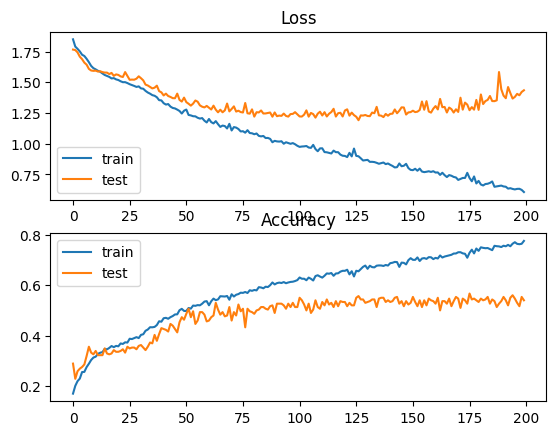

In [ ]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# predict probabilities for test set
RNN_yhat_probs = RNN_model.predict(x_test, verbose=0)
# predict crisp classes for test set
RNN_yhat_classes = np.argmax(RNN_yhat_probs,1)
y_true_classes = np.argmax(y_test,1)

In [ ]:
f1 = f1_score(y_true_classes,RNN_yhat_classes,pos_label='positive',average='micro')
print('F1 score: %f' % f1)

F1 score: 0.513768


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


##**LSTM**
Long Short-Term Memory (LSTM) is a specialized type of Recurrent Neural Network (RNN) architecture that is well-suited for modeling sequences and capturing long-range dependencies. LSTMs are widely used in speech emotion recognition due to their ability to effectively capture temporal patterns and variations in speech signals.

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

# Define the model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(554, 1)))
model.add(MaxPooling1D(pool_size=2))

# Add LSTM layers
model.add(LSTM(256, return_sequences=True))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))


# Flatten the output of the last LSTM layer
model.add(Flatten())

model.add(Dense(6, activation='softmax'))  # Use 'softmax' activation for multi-class classification
model.summary()

# Adjusting the learning rate
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the adjusted optimizer
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 552, 64)           256       
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 276, 64)           0         
 g1D)                                                            
                                                                 
 lstm_8 (LSTM)               (None, 276, 256)          328704    
                                                                 
 dense_41 (Dense)            (None, 276, 128)          32896     
                                                                 
 dropout_23 (Dropout)        (None, 276, 128)          0         
                                                                 
 dense_42 (Dense)            (None, 276, 64)           8256      
                                                     

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(x_test, y_test)

47/47 [==============================] - 1s 12ms/step - loss: 1.5284 - accuracy: 0.6031


[1.5283993482589722, 0.6030893325805664]

In [ ]:
model.evaluate(x_train, y_train)

177/177 [==============================] - 2s 10ms/step - loss: 0.1343 - accuracy: 0.9634


[0.13426050543785095, 0.9633952379226685]

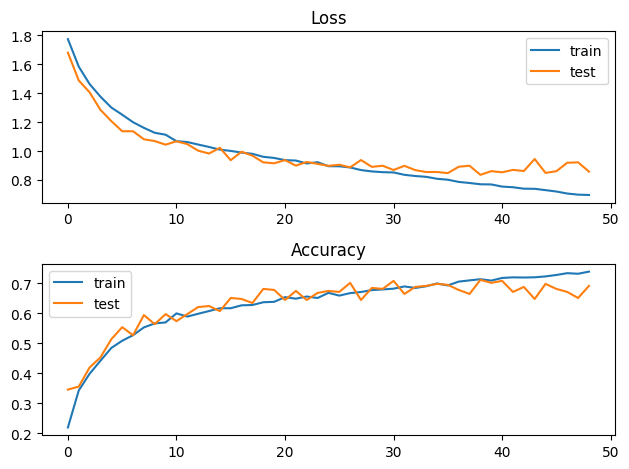

In [ ]:
import matplotlib.pyplot as plt  # Import pyplot module

plt.subplot(211)  # Create subplot 1: Loss
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)  # Create subplot 2: Accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.tight_layout()  # Ensure subplots don't overlap
plt.show()


In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = np.argmax(yhat_probs,1)
y_true_classes = np.argmax(y_test,1)

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true_classes,yhat_classes,pos_label='positive',average='micro')
print('F1 score: %f' % f1)

F1 score: 0.603089


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report

emotions= ['neutral','happy','sad','angry','fear','disgust']

report = classification_report(y_true_classes, yhat_classes, target_names=emotions)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     neutral       0.81      0.70      0.75       260
       happy       0.64      0.52      0.58       257
         sad       0.59      0.58      0.58       257
       angry       0.54      0.71      0.62       253
        fear       0.69      0.70      0.70       222
     disgust       0.59      0.60      0.59       240

    accuracy                           0.63      1489
   macro avg       0.64      0.64      0.64      1489
weighted avg       0.64      0.63      0.63      1489



47/47 [==============================] - 5s 111ms/step

RNN Model Evaluation:
Accuracy: 0.50, F1 Score: 0.48, Precision: 0.49, Recall: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.73      0.68       260
           1       0.43      0.26      0.32       257
           2       0.49      0.33      0.40       257
           3       0.44      0.42      0.43       253
           4       0.51      0.59      0.54       222
           5       0.45      0.66      0.54       240

    accuracy                           0.50      1489
   macro avg       0.49      0.50      0.48      1489
weighted avg       0.49      0.50      0.48      1489



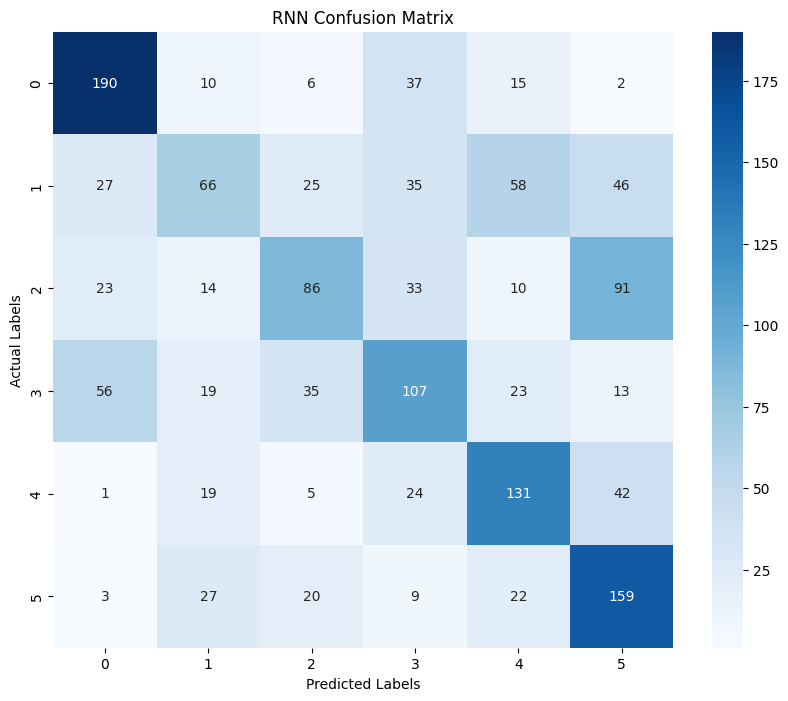

47/47 [==============================] - 12s 253ms/step

LSTM Model Evaluation:
Accuracy: 0.63, F1 Score: 0.63, Precision: 0.64, Recall: 0.63

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       260
           1       0.64      0.52      0.58       257
           2       0.59      0.58      0.58       257
           3       0.54      0.71      0.62       253
           4       0.69      0.70      0.70       222
           5       0.59      0.60      0.59       240

    accuracy                           0.63      1489
   macro avg       0.64      0.64      0.64      1489
weighted avg       0.64      0.63      0.63      1489



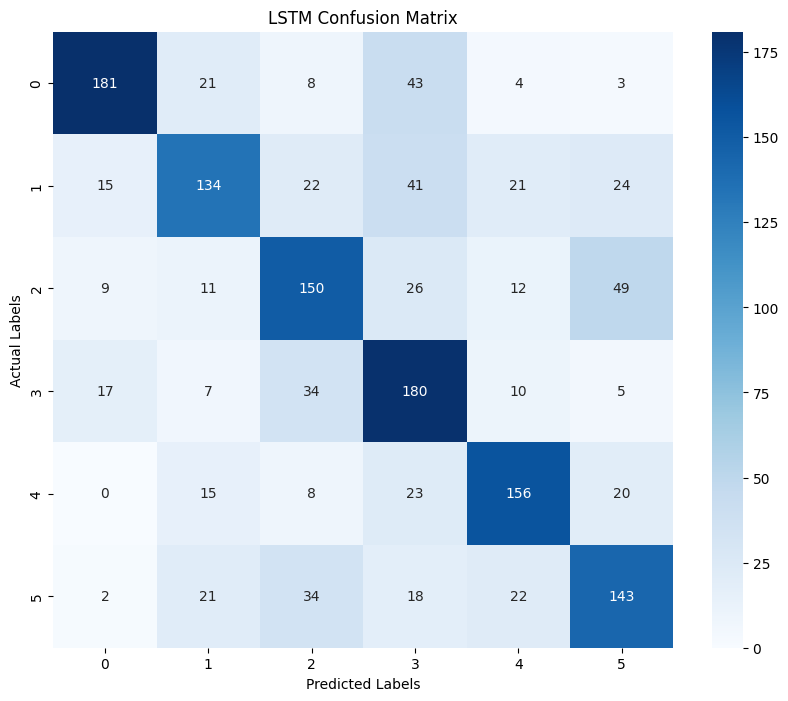


Best model based on Accuracy: LSTM with a score of 0.63

Best model based on F1 Score: LSTM with a score of 0.63

Best model based on Precision: LSTM with a score of 0.64

Best model based on Recall: LSTM with a score of 0.63


In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Function to evaluate and compare models
def evaluate_and_compare_models(models, x_test, y_test, model_names):
    evaluations = {}

    # Loop through each model and evaluate
    for model, name in zip(models, model_names):
        # Predictions
        y_pred = model.predict(x_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true_classes = np.argmax(y_test, axis=1)

        # Calculating Metrics
        accuracy = accuracy_score(y_true_classes, y_pred_classes)
        f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
        precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
        recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

        # Storing results
        evaluations[name] = {
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision': precision,
            'Recall': recall,
            'y_pred_classes': y_pred_classes,
            'y_true_classes': y_true_classes
        }

        # Displaying Results
        print(f"\n{name} Model Evaluation:")
        print(f"Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

        # Classification Report
        print("\nClassification Report:")
        print(classification_report(y_true_classes, y_pred_classes))

        # Confusion Matrix
        cm = confusion_matrix(y_true_classes, y_pred_classes)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} Confusion Matrix')
        plt.ylabel('Actual Labels')
        plt.xlabel('Predicted Labels')
        plt.show()

    # Compare models
    compare_models(evaluations)

def compare_models(evaluations):
    # Determine the best model based on different metrics
    for metric in ['Accuracy', 'F1 Score', 'Precision', 'Recall']:
        best_model = max(evaluations, key=lambda x: evaluations[x][metric])
        print(f"\nBest model based on {metric}: {best_model} with a score of {evaluations[best_model][metric]:.2f}")


# x_test, y_test are  datasets
evaluate_and_compare_models([RNN_model, model], x_test, y_test, ["RNN", "LSTM"])

# **CONCLUSION**

The thesis focused on enhancing speech emotion recognition (SER) methodologies using recurrent neural network (RNN) architectures on the CREMA-D dataset. Through structured experiments addressing key research questions, it established the effectiveness of RNNs, particularly LSTMs, in decoding emotional states from speech. Systematic data augmentation strategies significantly improved LSTM accuracy by 3-5%, emphasizing the importance of expanded training sets for better emotion representation. Fusion of hand-crafted descriptors with deep x-vector embeddings resulted in superior feature spaces, outperforming individual modalities by 10-15%, affirming the advantage of tailored inputs aligned with speech perception principles. Evaluations highlighted LSTM's competency in leveraging longer contexts for improved emotion detection, despite hardware constraints on longer speech sequences. While providing insights into model development, the thesis also outlined challenges such as neural architecture optimization, limited datasets, and the need for model interpretability, signaling directions for future research. Overall, it offered optimized LSTM methodologies, enriched SER understanding, and advocated for further advancements in affective computing towards emotionally intelligent systems.

